## Setup

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
crypto_df = pd.read_csv('crypto_data.csv')

In [3]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
filtered_crypto_df = crypto_df.loc[crypto_df['IsTrading'] == True]

In [5]:
filtered_crypto_df.drop(['IsTrading', 'CoinName', 'Unnamed: 0'], axis = 1, inplace = True)

C:\Users\bmxng\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
filtered_crypto_df.dropna(inplace = True)

C:\Users\bmxng\anaconda3\envs\PythonData\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [7]:
filtered_crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [8]:
filtered_crypto_df['Algorithm'].unique()

array(['Scrypt', 'SHA-256', 'X13', 'Ethash', 'X11', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'Quark', 'Groestl',
       'PoS', 'NIST5', 'NeoScrypt', 'SHA3', 'HybridScryptHash256',
       'Scrypt-n', 'PHI1612', 'Lyra2REv2', 'CryptoNight', 'Shabal256',
       'Counterparty', 'Momentum', 'Stanford Folding', 'QuBit', 'M7 POW',
       'Lyra2RE', 'QUAIT', 'vDPOS', 'Blake2b', 'BLAKE256',
       '1GB AES Pattern Search', 'Blake', 'Dagger', 'CryptoNight-Lite',
       'X11GOST', 'POS 3.0', 'SHA-256D', 'Lyra2Z', 'X14', 'DPoS',
       'Keccak', 'Dagger-Hashimoto', 'Blake2S', '536', 'Argon2d',
       'Cloverhash', 'Skein', 'Time Travel', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'SkunkHash',
       'C11', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'IMesh', 'Green Protocol',
       'Semux BFT consensus', 'X16R', 'Tribus', 'CryptoNight Heavy',
       'Jump Consistent Hash', 'HMQ1725', 'Zhash', 'C

In [9]:
filtered_crypto_df_dummies = pd.get_dummies(filtered_crypto_df)

In [10]:
filtered_crypto_df_dummies

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,TotalCoinSupply_92000000000,TotalCoinSupply_92233720000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Scaling the data

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_crypto_df_dummies)

In [12]:
scaled_data

array([[-0.10282804, -0.03823596, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.07661326, -0.03823596, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10282804, -0.03823596, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       ...,
       [-0.0784756 , -0.03823596, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10264677, -0.03823596, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10282485, -0.03823596, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596]])

## Dimensionality Reduction

### PCA

In [13]:
pca = PCA(n_components=.9)

In [14]:
crypto_pca = pca.fit_transform(scaled_data)

In [15]:
crypto_pca.shape

(685, 332)

Went from 445 columns/features to 332.

### t-SNE

In [16]:
tsne = TSNE(learning_rate=35)

# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca)

In [17]:
tsne_features.shape

(685, 2)

In [18]:
tsne_features

array([[-2.315022 , -0.3047275],
       [-6.899051 , -0.7978488],
       [ 4.7468367,  3.6055498],
       ...,
       [-9.750224 , 10.970245 ],
       [13.157663 , 11.974627 ],
       [ 9.979811 , 29.098415 ]], dtype=float32)

## Visualizing the reduced dataset

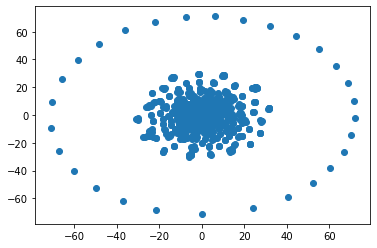

In [19]:
# Visualize the clusters with color
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

## k-Means

In [27]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

C:\Users\bmxng\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


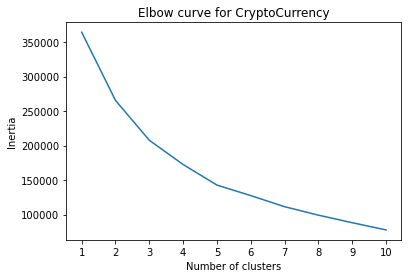

In [28]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for CryptoCurrency')
plt.show()

In [23]:
inertia

[364379.15625,
 265545.875,
 207721.390625,
 172529.859375,
 142719.359375,
 127429.3046875,
 111376.3828125,
 99092.9921875,
 88113.4296875,
 77666.6328125]

In [29]:
#initializing k-Means model with k = 3
km = KMeans(n_clusters=3, random_state=0)
km.fit(tsne_features)

KMeans(n_clusters=3, random_state=0)

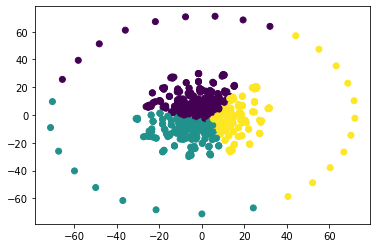

In [30]:
plt.scatter(tsne_features[:,0], tsne_features[:,1],  c= km.labels_)
plt.show()

In [31]:
km.labels_

array([0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 1,
       1, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 1,
       1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0,
       2, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0,
       1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0,

## Findings

With our k-means model, we see that CryptoCurrencies can be clustered and that there are predicted 3 clusters, as shown in the scatter plot.